<a href="https://colab.research.google.com/github/khixson1/Food-Sales-Prediction-Using-Machine-Learning/blob/main/Project1_Part5_Food_Sales_Predictions_Using_Machine_Learning_CORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Food_Sales_Predictions_Using_Machine_Learning

Kim Hixson

In [1]:
# Mount Drive in Google's Collaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import pandas as pd
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# upload sales_prediction.csv data
# read .csv into collaboratory
# check dataframe using head function

filename = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo/Week_1/Data_Uploads/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# 1) How many rows and columns?

print("The dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))


The dataset has 8523 rows and 12 columns


In [5]:
# 2) What are the datatypes of each variable?

display(df.dtypes)



Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
# 3) Are there duplicates? If so, drop any duplicates. (There seems to be no duplicate rows)

# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

df = df.drop_duplicates()



Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [10]:
# check column names for spaces or other problematic strings
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
# 1b) Identify missing values in this dataset.
# display the info of the dataframe which shows missing values and datatypes

display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


None

In [14]:
# use value_counts to look for inconsistancies in categories within each column

# value_counts of 'Attrition' column
attrition_cat = pd.Series(df['Item_Identifier']).value_counts()
display(attrition_cat)
print('________________________________________')

# value_counts of 'BusinessTravel' column
business_travel_cat = pd.Series(df['Item_Fat_Content']).value_counts()
display(business_travel_cat)
print('________________________________________')

# value_counts of 'Department' column
department_cat = pd.Series(df['Item_Type']).value_counts()
display(department_cat)
print('________________________________________')

# value_counts of 'EducationField' column
education_cat = pd.Series(df['Outlet_Identifier']).value_counts()
display(education_cat)
print('________________________________________')

# value_counts of 'Gender' column
gender_cat = pd.Series(df['Outlet_Size']).value_counts()
display(gender_cat)
print('________________________________________')

# value_counts of 'JobRole' column
jobrole_cat = pd.Series(df['Outlet_Location_Type']).value_counts()
display(jobrole_cat)
print('________________________________________')

# value_counts of 'MaritalStatus' column
marital_cat = pd.Series(df['Outlet_Type']).value_counts()
display(marital_cat)
print('________________________________________')


FDG33    10
FDW13    10
NCB18     9
FDG09     9
FDV60     9
         ..
FDT35     1
FDQ60     1
FDC23     1
FDK57     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

________________________________________


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

________________________________________


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

________________________________________


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

________________________________________


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

________________________________________


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

________________________________________


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

________________________________________


In [16]:
# Value counts from above shows that there are 3 different notations for low fat, and two notations for regular
# We will correct these columns here and use groupby to show the correction

df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)
df

df.groupby(['Item_Fat_Content']).count()




,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Fat_Content,,,,,,,,,,,
Low Fat,5517,4566,5517,5517,5517,5517,5517,3955,5517,5517,5517
Regular,3006,2494,3006,3006,3006,3006,3006,2158,3006,3006,3006


In [ ]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean)

# Separating numerical data in df
df.dtypes == 'object'

num_vars = df.columns[df.dtypes != 'object']

# Showing summary statistics of each
df[num_vars].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.873262,0.066132,140.992782,1997.831867,2181.288914
std,4.646486,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
# 9) Import graphing libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

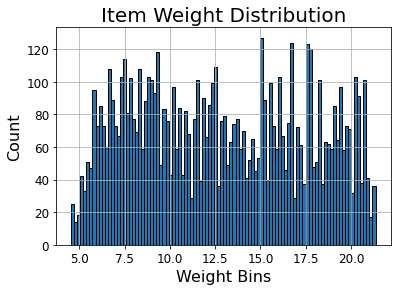

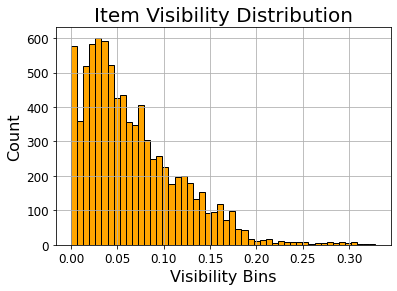

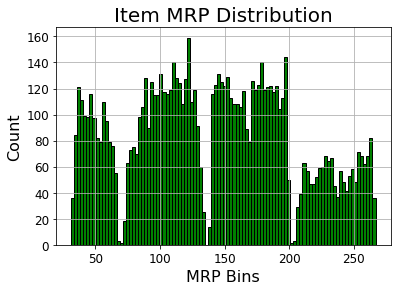

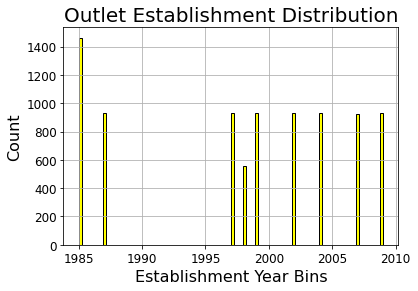

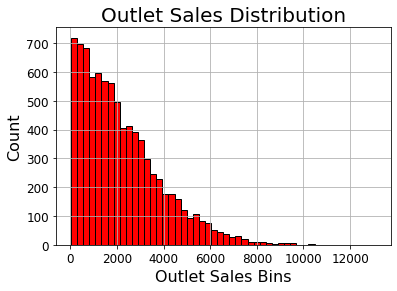

In [18]:
# 10) Create histograms of numberical data: "Item_Weight", "Item_Visibility", "Item_MRP", 
#      "Outlet_Establishment_Year", and "Item_Outlet_Sales"

# Histogram of "Item_Weight"
df['Item_Weight'].hist(bins = 100, edgecolor = 'black');
plt.title("Item Weight Distribution", fontsize = 20);
plt.xlabel("Weight Bins", fontsize = 16);
plt.ylabel("Count", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()

# Histogram of "Item_Visibility"
df['Item_Visibility'].hist(bins = 50, edgecolor = 'black', color = 'orange');
plt.title("Item Visibility Distribution", fontsize = 20);
plt.xlabel("Visibility Bins", fontsize = 16);
plt.ylabel("Count", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()

# Histogram of "Item_MRP"
df['Item_MRP'].hist(bins = 100, edgecolor = 'black', color = 'green');
plt.title("Item MRP Distribution", fontsize = 20);
plt.xlabel("MRP Bins", fontsize = 16);
plt.ylabel("Count", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()

# Histogram of "Outlet_Extablishment_Year"
df['Outlet_Establishment_Year'].hist(bins = 100, edgecolor = 'black', color = 'yellow');
plt.title("Outlet Establishment Distribution", fontsize = 20);
plt.xlabel("Establishment Year Bins", fontsize = 16);
plt.ylabel("Count", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()

# Histogram of "Item_Outlet_Sales"
df['Item_Outlet_Sales'].hist(bins = 50, edgecolor = 'black', color = 'red');
plt.title("Outlet Sales Distribution", fontsize = 20);
plt.xlabel("Outlet Sales Bins", fontsize = 16);
plt.ylabel("Count", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()

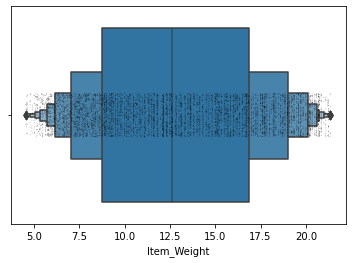

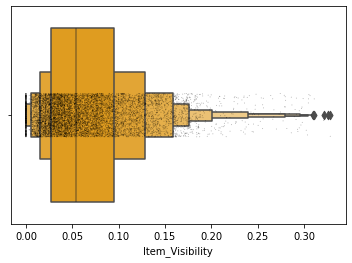

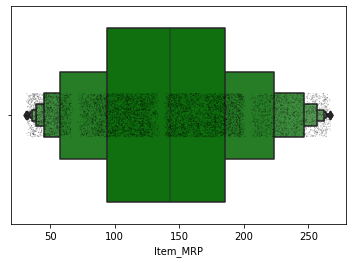

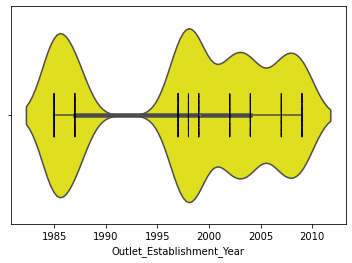

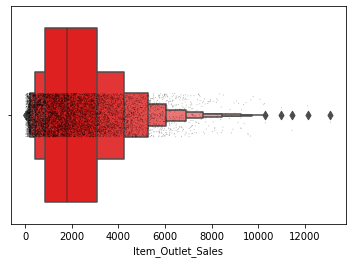

In [19]:
# 11) Create boxplots to view statistical summaries of various features in "Item_Weight", "Item_Visibility", "Item_MRP", 
#      "Outlet_Establishment_Year", and "Item_Outlet_Sales" categories.

# Boxenplot of "Item_Visibility" data
sns.boxenplot(x = df['Item_Weight']);
# Add in points to show each observation
sns.stripplot(x = df['Item_Weight'],
              size=1, color="black", marker = 'o', alpha = 0.3) 
plt.show()

# Boxenplot of "Item_Visibility" data
sns.boxenplot(x = df['Item_Visibility'], color = 'orange');
# Add in points to show each observation
sns.stripplot(x = df['Item_Visibility'],
              size=1, color="black", marker = 'o', alpha = 0.3) 
plt.show()

# Boxenplot of "Item_MRP" data
sns.boxenplot(x = df['Item_MRP'], color = 'green');
# Add in points to show each observation
sns.stripplot(x = df['Item_MRP'],
              size=1, color="black", marker = 'o', alpha = 0.3) 
plt.show()

# Boxenplot of "Outlet_Establishment_Year" data
sns.violinplot(x = df['Outlet_Establishment_Year'], color = 'yellow');
# Add in points to show each observation
sns.stripplot(x = df['Outlet_Establishment_Year'],
              size=1, color="black", marker = 'o', alpha = 0.3) 
plt.show()

# Boxenplot of "Item_Outlet_Sales" data
sns.boxenplot(x = df['Item_Outlet_Sales'], color = 'red');
# Add in points to show each observation
sns.stripplot(x = df['Item_Outlet_Sales'],
              size=1, color="black", marker = 'o', alpha = 0.3) 
plt.show()

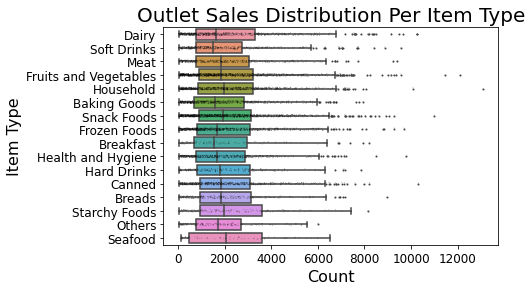

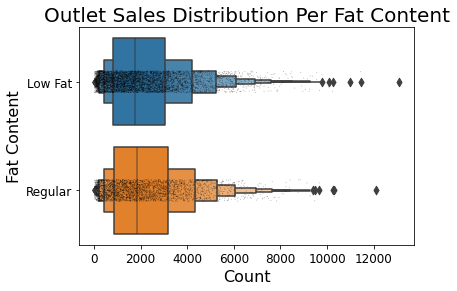

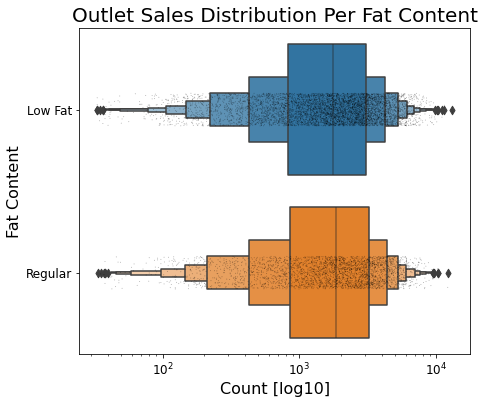

In [21]:
# test

# Boxplots of "Item_Outlet_Sales" data per "Item_Type" category
my_box_2 = sns.boxplot(x = df['Item_Outlet_Sales'], y = df['Item_Type'], data = df, flierprops= dict(marker = 'o', markersize = 1));
# Add in points to show each observation
sns.stripplot(x = df['Item_Outlet_Sales'], y = df['Item_Type'], data = df,
              size=1, color="black", marker = 'o', alpha = 0.3)
plt.title("Outlet Sales Distribution Per Item Type", fontsize = 20);
plt.xlabel("Count", fontsize = 16);
plt.ylabel("Item Type", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()

# Boxplots of "Item_Outlet_Sales" data per "Item_Fat_Content" category
my_box_2 = sns.boxenplot(x = df['Item_Outlet_Sales'], y = df['Item_Fat_Content'], data = df);
# Add in points to show each observation
sns.stripplot(x = df['Item_Outlet_Sales'], y = df['Item_Fat_Content'], data = df,
              size=1, color="black", marker = 'o', alpha = 0.3)
plt.title("Outlet Sales Distribution Per Fat Content", fontsize = 20);
plt.xlabel("Count", fontsize = 16);
plt.ylabel("Fat Content", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()

# Boxplot after log transform
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log", basex = 10)
sns.boxenplot(x=df['Item_Outlet_Sales'], y=df['Item_Fat_Content'], data=df)
# Add in points to show each observation
sns.stripplot(x = df['Item_Outlet_Sales'], y = df['Item_Fat_Content'], data = df,
              size=1, color="black", marker = 'o', alpha = 0.3)
plt.title("Outlet Sales Distribution Per Fat Content", fontsize = 20);
plt.xlabel("Count [log10]", fontsize = 16);
plt.ylabel("Fat Content", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


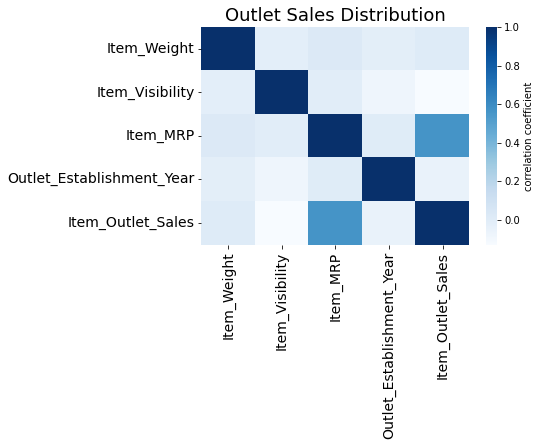

In [22]:
# 12) Create a heatmap of the correlation between numeric categories.
df_cor = df.corr()
display(df_cor)

sns.heatmap(df_cor, cmap = 'Blues', cbar_kws={'label': 'correlation coefficient'});
plt.title("Outlet Sales Distribution", fontsize = 18);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);



In [23]:
# filter out individual item types and combine refrigerated foods

# order outlet types from smallest to highest
df["Outlet_Type"] = pd.Categorical(df['Outlet_Type'], categories=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])

# fruits and vegetables filter
fruits_veg_fil = df['Item_Type'] == 'Fruits and Vegetables'
fruits_veg_df = pd.DataFrame(df[fruits_veg_fil])

# snack foods filter
snack_fil = df['Item_Type'] == 'Snack Foods'
snack_df = pd.DataFrame(df[snack_fil])

# household items filter
household_fil = df['Item_Type'] == 'Household'
household_df = pd.DataFrame(df[household_fil])

# frozen foods filter
frozen_fil = df['Item_Type'] == 'Frozen Foods'
frozen_df = pd.DataFrame(df[frozen_fil])

# dairy filter
dairy_fil = df['Item_Type'] == 'Dairy'
dairy_df = pd.DataFrame(df[dairy_fil])

# canned filter
canned_fil = df['Item_Type'] == 'Canned'
canned_df = pd.DataFrame(df[canned_fil])

# baking goods filter
baking_fil = df['Item_Type'] == 'Baking Goods'
baking_df = pd.DataFrame(df[baking_fil])

# health and hygiene filter
health_fil = df['Item_Type'] == 'Health and Hygiene'
health_df = pd.DataFrame(df[health_fil])

# soft drinks
soft_fil = df['Item_Type'] == 'Soft Drinks'
soft_df = pd.DataFrame(df[soft_fil])

# meat filter
meat_fil = df['Item_Type'] == 'Meat'
meat_df = pd.DataFrame(df[meat_fil])

# breads filter
bread_fil = df['Item_Type'] == 'Breads'
bread_df = pd.DataFrame(df[bread_fil])

# hard drinks filter
hard_fil = df['Item_Type'] == 'Hard Drinks'
hard_df = pd.DataFrame(df[hard_fil])

# others filter
other_fil = df['Item_Type'] == 'Others'
other_df = pd.DataFrame(df[other_fil])

# starchy foods filter
starchy_fil = df['Item_Type'] == 'Starchy Foods'
starchy_df = pd.DataFrame(df[starchy_fil])

# breakfast filter
breakfast_fil = df['Item_Type'] == 'Breakfast'
breakfast_df = pd.DataFrame(df[breakfast_fil])

# seafood filter
sea_fil = df['Item_Type'] == 'Seafood'
sea_df = pd.DataFrame(df[sea_fil])

# combine dataframes for single refrigerated items dataframe and reset and replace the index
fridge_items = pd.concat([dairy_df, meat_df, sea_df])
fridge_items.sort_values('Outlet_Type')
fridge_items.reset_index(drop=True, inplace=True)

display(fridge_items.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,FDA03,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
2,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
3,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
4,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868


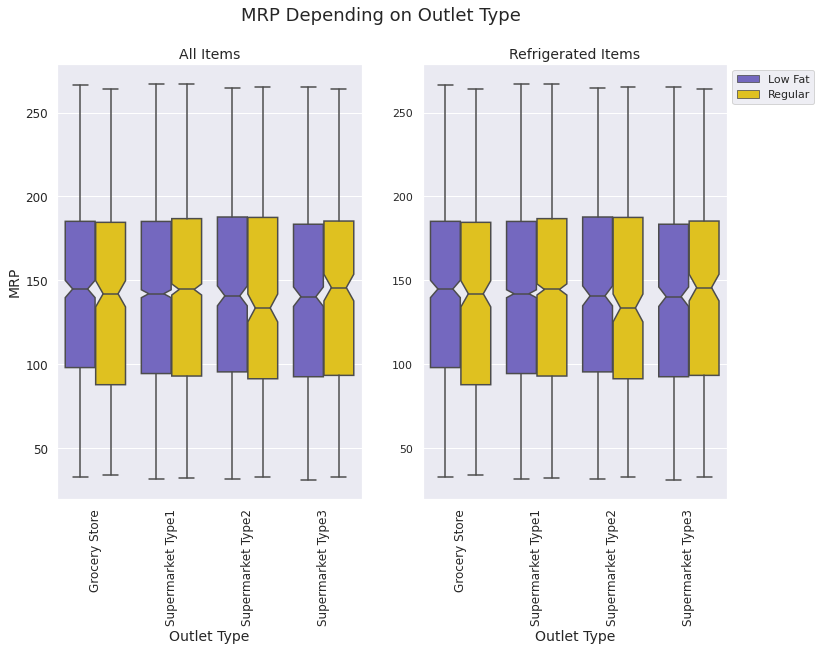

In [25]:
# order outlet types from smallest to highest
df["Outlet_Type"] = pd.Categorical(df['Outlet_Type'], categories=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])

# set theme and palette
sns.set_theme(style="darkgrid");
sns.color_palette('tab10');

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2);
fig.suptitle('MRP Depending on Outlet Type', fontsize=18);
fig.set_size_inches(12, 8)

# Plot 1:

# define plot location
plt.subplot(1, 2, 1);
# draw plot1
ord = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
ax1 = sns.boxplot(x = df['Outlet_Type'], 
                  y = df['Item_MRP'],
                  hue = df['Item_Fat_Content'],
                  data=df,
                  notch=True,
                  palette=["slateblue", "gold"],
                  order = ord);
# define title, labels, font sizes, and limits
plt.title('All Items', fontsize=14);
plt.xlabel('Outlet Type', fontsize=14);
plt.ylabel('MRP', fontsize=14);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
# rotate x-axis labels to make them viewable
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90);
# remove legend from Plot1
ax1.get_legend().remove();

# Plot 2:
# define plot location
plt.subplot(1, 2, 2);
# draw plot1
ax2 = sns.boxplot(x = df['Outlet_Type'], 
                  y = df['Item_MRP'],
                  hue = df['Item_Fat_Content'],
                  data=df,
                  notch=True,
                  palette=["slateblue", "gold"],
                  order = ord);
# define title, labels, font sizes, and limits
plt.title('Refrigerated Items', fontsize=14);
plt.xlabel('Outlet Type', fontsize=14);
plt.xticks(fontsize=12);
plt.yticks();
plt.ylabel('')

# rotate x-axis labels to make them viewable
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90);
# add legend from Plot2
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1));

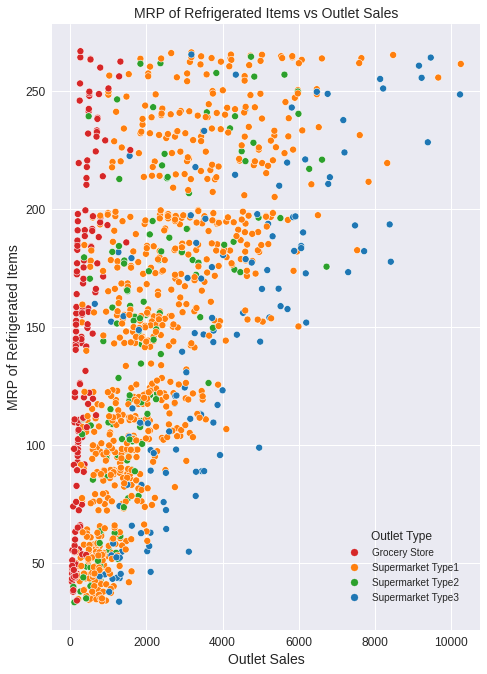

In [26]:
# create a box plot showing fat content distribution between refrigerated items

# set style for the plot
plt.style.use('seaborn');

# make a relplot to show Item MRP according to Item Outlet Sales according to Outlet Type
ord = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
palette = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue']
ax = sns.relplot(data=fridge_items,
            x=fridge_items['Item_Outlet_Sales'],
            y=fridge_items['Item_MRP'],
            hue=fridge_items['Outlet_Type'],
            hue_order = ord,
            palette = palette,
            legend = 'full'
            );


# define fonts, labels and titles
plt.title('MRP of Refrigerated Items vs Outlet Sales', fontsize=14);
plt.xlabel('Outlet Sales', fontsize=14);
plt.ylabel('MRP of Refrigerated Items', fontsize=14);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

# set figure size
ax.fig.set_size_inches(10,10)

# set legend parameters
leg = ax._legend
leg.set_bbox_to_anchor([0.65, 0.15])
leg.set_title('Outlet Type')

This scatter plot shows manufacturer's retail price versus the outlet sales.  Each dot is colored according to what outlet type it is (i.e., grocery store, supermarket type 1, supermarket type 2, or supermarket type3). The graph shows that Supermarkets of Type1 who sale appear to sale the most refrigerated items compared to other outlet types. Also this shows that there is positive correlation between average MRP of refrigerated items and outlet sales for each outlet with outlet sales being least at grocery stores and the most in Supermarkets of Type3.

In [27]:
# order outlet types from smallest to highest
df["Outlet_Type"] = pd.Categorical(df['Outlet_Type'], categories=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])

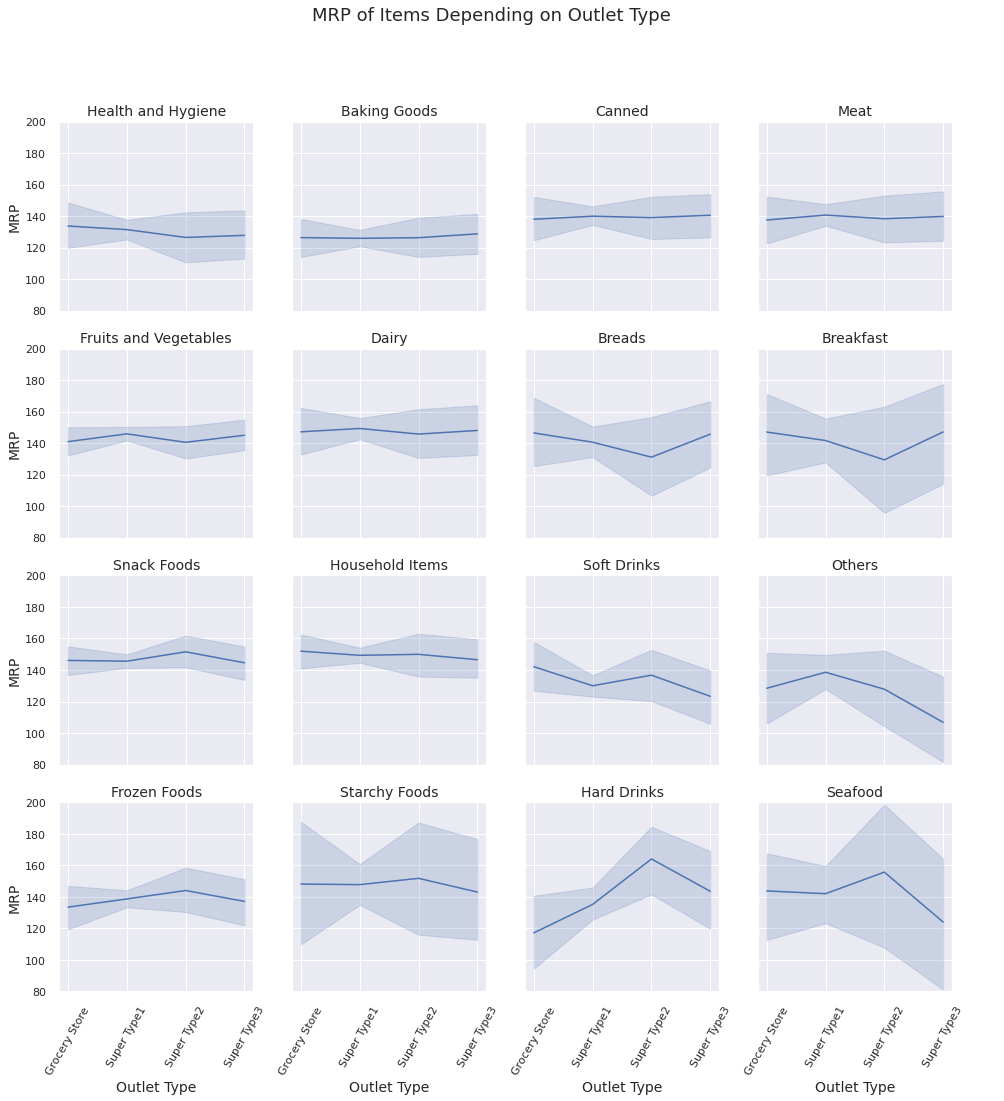

In [28]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (4 rows, 4 columns)
fig, axes = plt.subplots(4, 4, figsize=(16, 16));
fig.suptitle('MRP of Items Depending on Outlet Type', fontsize=18);

#plot1
ax1 = sns.lineplot(data=health_df,
             x = health_df['Outlet_Type'], 
             y = health_df['Item_MRP'],
             ax = axes[0,0]);
ax1.set_title('Health and Hygiene', fontsize=14);
ax1.set_xlabel('');
ax1.set_ylabel('');
ax1.set_ylim(80, 200);
ax1.set_ylabel('MRP', fontsize=14);
ax1.set_xticklabels('');
ax1.tick_params(axis='x', colors='white');

#plot2
ax2 = sns.lineplot(data=baking_df,
             x = baking_df['Outlet_Type'], 
             y = baking_df['Item_MRP'],
             ax = axes[0,1]);
ax2.set_title('Baking Goods', fontsize=14);
ax2.set_xlabel('');
ax2.set_ylabel('');
ax2.set_ylim(80, 200);
ax2.set_yticklabels('');
ax2.tick_params(axis='x', colors='white')

#plot3
ax3 = sns.lineplot(data=canned_df,
             x = canned_df['Outlet_Type'], 
             y = canned_df['Item_MRP'],
             ax = axes[0,2]);
ax3.set_title('Canned', fontsize=14);
ax3.set_xlabel('');
ax3.set_ylabel('');
ax3.set_ylim(80, 200);
ax3.set_yticklabels('');
ax3.tick_params(axis='x', colors='white')

#plot4
ax4 = sns.lineplot(data=meat_df,
             x = meat_df['Outlet_Type'], 
             y = meat_df['Item_MRP'],
             ax = axes[0,3]);
ax4.set_title('Meat', fontsize=14);
ax4.set_xlabel('');
ax4.set_ylabel('');
ax4.set_ylim(80, 200);
ax4.set_yticklabels('');
ax4.tick_params(axis='x', colors='white')

#plot5
ax5 = sns.lineplot(data=fruits_veg_df,
             x = fruits_veg_df['Outlet_Type'], 
             y = fruits_veg_df['Item_MRP'],
             ax = axes[1,0]);
ax5.set_title('Fruits and Vegetables', fontsize=14);
ax5.set_xlabel('');
ax5.set_ylabel('');
ax5.set_ylim(80, 200);
ax5.set_ylabel('MRP', fontsize=14);
ax5.tick_params(axis='x', colors='white')

#plot6
ax6 = sns.lineplot(data=dairy_df,
             x = dairy_df['Outlet_Type'], 
             y = dairy_df['Item_MRP'],
             ax = axes[1,1]);
ax6.set_title('Dairy', fontsize=14);
ax6.set_xlabel('');
ax6.set_ylabel('');
ax6.set_ylim(80, 200);
ax6.set_yticklabels('');
ax6.tick_params(axis='x', colors='white')

#plot7
ax7 = sns.lineplot(data=bread_df,
             x = bread_df['Outlet_Type'], 
             y = bread_df['Item_MRP'],
             ax = axes[1,2]);
ax7.set_title('Breads', fontsize=14);
ax7.set_xlabel('');
ax7.set_ylabel('');
ax7.set_ylim(80, 200);
ax7.set_yticklabels('');
ax7.tick_params(axis='x', colors='white')

#plot8
ax8 = sns.lineplot(data=breakfast_df,
             x = breakfast_df['Outlet_Type'], 
             y = breakfast_df['Item_MRP'],
             ax = axes[1,3]);
ax8.set_title('Breakfast', fontsize=14);
ax8.set_xlabel('');
ax8.set_ylabel('');
ax8.set_ylim(80, 200);
ax8.set_yticklabels('');
ax8.tick_params(axis='x', colors='white')

#plot9
ax9 = sns.lineplot(data=snack_df,
             x = snack_df['Outlet_Type'], 
             y = snack_df['Item_MRP'],
             ax = axes[2,0]);
ax9.set_title('Snack Foods', fontsize=14);
ax9.set_xlabel('');
ax9.set_ylabel('');
ax9.set_ylim(80, 200);
ax9.set_ylabel('MRP', fontsize=14);
ax9.tick_params(axis='x', colors='white')

#plot10
ax10 = sns.lineplot(data=household_df,
             x = household_df['Outlet_Type'], 
             y = household_df['Item_MRP'],
             ax = axes[2,1]);
ax10.set_title('Household Items', fontsize=14);
ax10.set_xlabel('');
ax10.set_ylabel('');
ax10.set_ylim(80, 200);
ax10.set_yticklabels('');
ax10.tick_params(axis='x', colors='white')

#plot11
ax11 = sns.lineplot(data=soft_df,
             x = soft_df['Outlet_Type'], 
             y = soft_df['Item_MRP'],
             ax = axes[2,2]);
ax11.set_title('Soft Drinks', fontsize=14);
ax11.set_xlabel('');
ax11.set_ylabel('');
ax11.set_ylim(80, 200);
ax11.set_yticklabels('');
ax11.tick_params(axis='x', colors='white')

#plot12
ax12 = sns.lineplot(data=other_df,
             x = other_df['Outlet_Type'], 
             y = other_df['Item_MRP'],
             ax = axes[2,3]);
ax12.set_title('Others', fontsize=14);
ax12.set_xlabel('');
ax12.set_ylabel('');
ax12.set_ylim(80, 200);
ax12.set_yticklabels('');
ax12.tick_params(axis='x', colors='white')

#plot13
ax13 = sns.lineplot(data=frozen_df,
             x = frozen_df['Outlet_Type'], 
             y = frozen_df['Item_MRP'],
             ax = axes[3,0]);
ax13.set_title('Frozen Foods', fontsize=14);
ax13.set_xlabel('');
ax13.set_ylabel('');
ax13.set_ylim(80, 200);
ax13.set_ylabel('MRP', fontsize=14);
ax13.set_xlabel("Outlet Type", fontsize = 14)
ax13.set_xticklabels(["Grocery Store","Super Type1","Super Type2","Super Type3"])
ax13.set_xticklabels(ax13.get_xticklabels(), rotation=60);

#plot14
ax14 = sns.lineplot(data=starchy_df,
             x = starchy_df['Outlet_Type'], 
             y = starchy_df['Item_MRP'],
             ax = axes[3,1]);
ax14.set_title('Starchy Foods', fontsize=14);
ax14.set_xlabel('');
ax14.set_ylabel('');
ax14.set_ylim(80, 200);
ax14.set_yticklabels('');
ax14.set_xlabel("Outlet Type", fontsize = 14)
ax14.set_xticklabels(["Grocery Store","Super Type1","Super Type2","Super Type3"])
ax14.set_xticklabels(ax14.get_xticklabels(), rotation=60);

#plot15
ax15 = sns.lineplot(data=hard_df,
             x = hard_df['Outlet_Type'], 
             y = hard_df['Item_MRP'],
             ax = axes[3,2]);
ax15.set_title('Hard Drinks', fontsize=14);
ax15.set_xlabel('');
ax15.set_ylabel('');
ax15.set_ylim(80, 200);
ax15.set_yticklabels('');
ax15.set_xlabel("Outlet Type", fontsize = 14)
ax15.set_xticklabels(["Grocery Store","Super Type1","Super Type2","Super Type3"])
ax15.set_xticklabels(ax15.get_xticklabels(), rotation=60);

#plot16
ax16 = sns.lineplot(data=sea_df,
             x = sea_df['Outlet_Type'], 
             y = sea_df['Item_MRP'],
             ax = axes[3,3]);
ax16.set_title('Seafood', fontsize=14);
ax16.set_xlabel('');
ax16.set_ylabel('');
ax16.set_ylim(80, 200);
ax16.set_yticklabels('');
ax16.set_xlabel("Outlet Type", fontsize = 14)
ax16.set_xticklabels(["Grocery Store","Super Type1","Super Type2","Super Type3"])
ax16.set_xticklabels(ax16.get_xticklabels(), rotation=60);


This graph shows the average manufacturer's retail price with confidence intervals for 16 catagories and shows how these averages differ between outlet types. Items such as hard drinks and seafood tend to be highest at supermarket type 2 outlets. Soft drinks, and seafood tend to be cheapest at supermarket type 3 outlets. Hard drinks however tend to be cheapest at grocery stores.

In [29]:
# Machine learning prediction about future sales
# Identify the target (X) and features (y): 
# Assign the "Item_Outlet_Sales" column as the target and the rest of the relevant variables as your features matrix

X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [30]:
# Perform a Test/Train Split
# Set random_state to 42 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [31]:
# Create Pre-Processing Pipeline to prepare dataset for machine learning
# Use make_column_selector to select the categorical columns and the numeric columns

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [32]:
# Instantiate Transformers 
# I'm adding this imputation here just as good practice to ensure there was no error in imputation earlier

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [33]:
# View categorical and numeric columns

cat_data = X_train[cat_selector(X_train)]
display(cat_data.head())

num_data = X_train[num_selector(X_train)]
display(num_data.head())

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type
4776,NCG06,Low Fat,Household,OUT018,Medium,Tier 3
7510,FDV57,Regular,Snack Foods,OUT018,Medium,Tier 3
5828,FDM27,Regular,Meat,OUT049,Medium,Tier 1
5327,FDG24,Low Fat,Baking Goods,OUT035,Small,Tier 2
4810,FDD05,Low Fat,Frozen Foods,OUT045,NaN,Tier 2


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
4776,16.350,0.029565,256.4646,2009
7510,15.250,0.000000,179.7660,2009
5828,12.350,0.158716,157.2946,1999
5327,7.975,0.014628,82.3250,2004
4810,19.350,0.016645,120.9098,2002


In [34]:
# View one hot encoder columns

ohe_encoder.fit(cat_data)
cat_ohe = ohe_encoder.transform(cat_data)
cat_ohe

cat_ohe_df = pd.DataFrame(cat_ohe, columns=ohe_encoder.get_feature_names_out(cat_data.columns))
cat_ohe_df.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,Item_Identifier_DRE49,Item_Identifier_DRE60,Item_Identifier_DRF01,Item_Identifier_DRF03,Item_Identifier_DRF13,Item_Identifier_DRF15,...,Item_Identifier_NCZ30,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [35]:
# Make Pipelines for each column type

num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

In [36]:
# Match pipe to column

num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [37]:
# Create a pre processing pipeline to prepare the dataset for Machine Learning
# Make column Transformer

col_trans = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f082cf90c90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f082cf90c10>)])